In [2]:
import process_data
import utils
import numpy as np
import eval
import data
import model
import torch
import modernUnet

In [3]:
gta_root = 'E:/GTA5'

train_set, val_set = data.loadData(root="E:/CityScapes", subsize=(256,512), flip=False ,verbose=True)
#train_set, val_set = data.loadGTAData(root=gta_root, subsize=(256,512),verbose=True)

train_dl, val_dl = data.getDataLoader(train_set=train_set, val_set=val_set, batch_size=8)

#model = model.Model()
model = modernUnet.MUN()
model.load_state_dict(torch.load('../Trained_models/modernUnet-PT-best.pth'))
#model.load_state_dict(torch.load('./model_best.pth'))



#eval.single_IOU(target, prediction)

Size of the training set: 2380
Size of the validation set: 595


<All keys matched successfully>

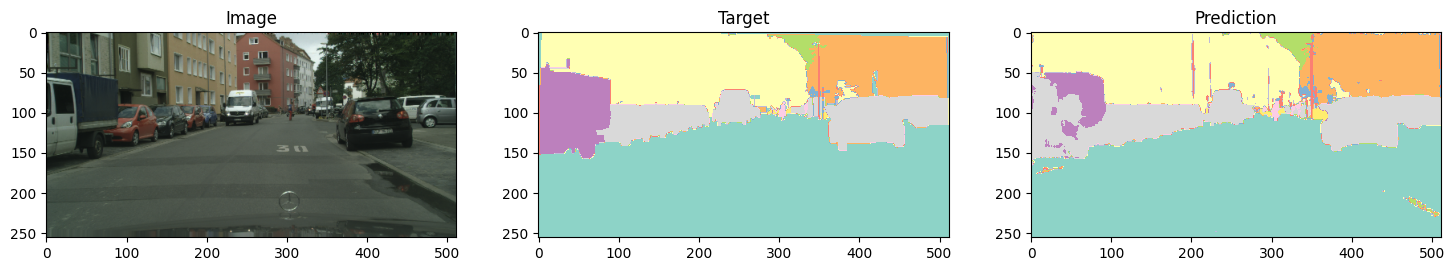

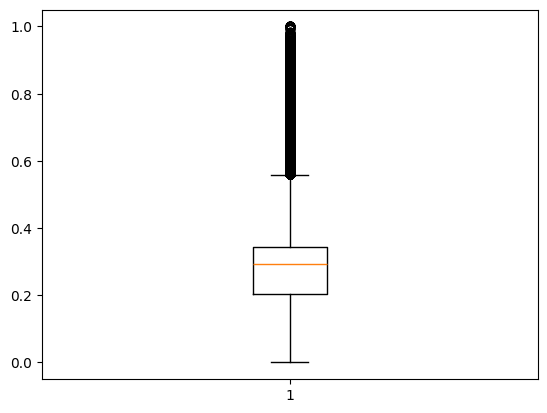

In [4]:
image, target = eval.getRandomImageAndTarget(val_set)
prediction = eval.predict(image, model.cuda(),'cuda', (256,512))
eval.showImageTargetAndPrediction(image, target, prediction)
eval.showPixelValues(image)

In [5]:
eval.IOU(val_dl, model.cuda(), 'cuda', (256,512))

0.5296402360589654

In [ ]:
eval.DICE(val_dl,model.cuda(),'cuda',(256,512))